<font size="9">MTH 484 - UQ - Homework 3</font>

Answer the following questions inside this Julia Notebook, using either mathematical typesetting or julia code as necessary.  If the $\LaTeX$ code becomes too much work, you can submit those problems in on paper, but I would note that you should be able to copy, paste, and edit most of the math formatting already in this document.

Due date: 10/15/19

---

## Problem 1

The solution to problem 2 from the last assignment is something like the following system:

$$ \begin{align}
\frac{dR}{dt} &= r_1 R (L_1 - R) - c_1 R S \\
\frac{dS}{dt} &= r_2 S (L_2 - S) - c_2 R S 
\end{align}$$


$$ \text{with } R(0) = R_0, \quad S(0) = S_0. $$

This system can be modeled using the the following code:

In [2]:
using DifferentialEquations, Distributions,ParameterizedFunctions, Statistics, Plots; gr();

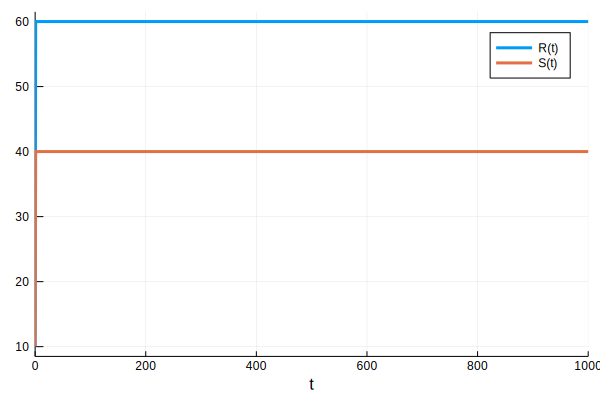

In [3]:
RHS = @ode_def begin
    dR = r1 * R * (L1 - R) - c1 * R * S
    dS = r2 * S * (L2 - S) - c2 * R * S
end r1 r2 L1 L2 c1 c2

# Function to solve the ODE given the parameters
function solve_ode(r1,r2,L1,L2,c1,c2,R0,S0)
    u0 = [R0, S0]
    tspan = (0, 1000.0)
    p = [r1,r2,L1,L2,c1,c2]
    prob = ODEProblem(RHS,u0,tspan,p)
    sol = solve(prob)
    
    return sol
end

# Example solution
example_solution = solve_ode(1.0, 1.5, 100.0, 80.0, 1.0, 1.0, 10.0, 10.1);

# Make a plot of the example solution
plot(example_solution)

and the equilibrium points can be estimated by:

In [4]:
function eqpts_ode(r1,r2,L1,L2,c1,c2,R0,S0)
    
    # First get the solution
    sol = solve_ode(r1,r2,L1,L2,c1,c2,R0,S0)
    
    # Get the last time point and return as eq point
    return sol.u[end]
end;

# See if it works
eqpts_ode(0.75, 1.0, 100.0, 50.0, 1.0, 0.75, 10.0, 15)

2-element Array{Float64,1}:
 100.00000000000001     
  -8.456160381889048e-35

If the parameters are distributed as the following:

- $r_1$ = 0.75
- $r_2 \sim Unif[1,1.5]$
- $L_1 \sim Unif[70,80]$
- $L_2$ = 50.0
- $c_1$ = 1.0
- $c_2$ = 0.75
- $R_0$ = 10.0
- $S_0$ = 15.0

where only $r_2$ and $L_1$ are allowed to vary (uniform over their respective ranges), what can we say about the the equillibrium points for $S$?  Use random samples ($N \approx 10,000$) of the solution to show (with a plot) the expected output of $S$.



The equilibrium points vary a lot depending on each value of $r_2$ and $L_1$ as shown in the graph below. Also,the equiribium point of 
each sample is not distributed uniformly or normally as shown in the histogram below. Most of the equiriblium points ended up being 0 or closer to 0. 

In [5]:
r2_dist = Uniform(1,1.5)
L1_dist = Uniform(70.0,80.0)

Uniform{Float64}(a=70.0, b=80.0)

In [6]:
N = 10000
soul_samples = zeros(N,101)
eq_ary = zeros(N)
for i in 1:N
    sol = solve_ode(0.75, rand(r2_dist), rand(L1_dist), 50.0, 1.0, 0.75, 10.0, 15.0)
    soul_samples[i,:] = sol.(0:0.05:5, idxs=2)
    eq_ary[i] = sol.u[end][2]
end
m_soul = mean(soul_samples,dims=1)
m_input_soul = solve_ode(0.75,mean(r2_dist),mean(L1_dist), 50.0,1.0,0.75, 10.0,15.0).(0:0.05:5, idxs=2);
# eq_ary

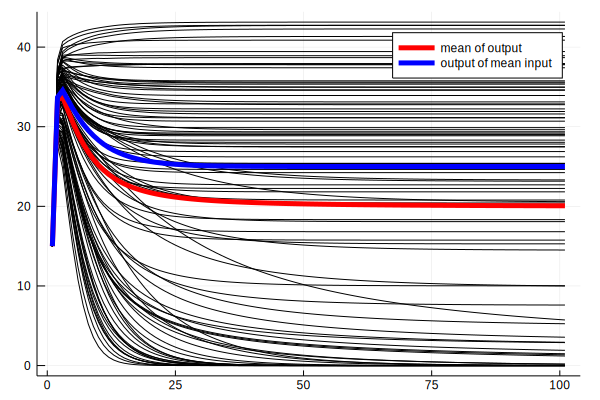

In [82]:
plot(soul_samples', legend=true, label="", color=:black)
plot!(m_soul', color=:red, linewidth=5, label="mean of output")
plot!(m_input_soul, color=:blue, linewidth=5, label="output of mean input")

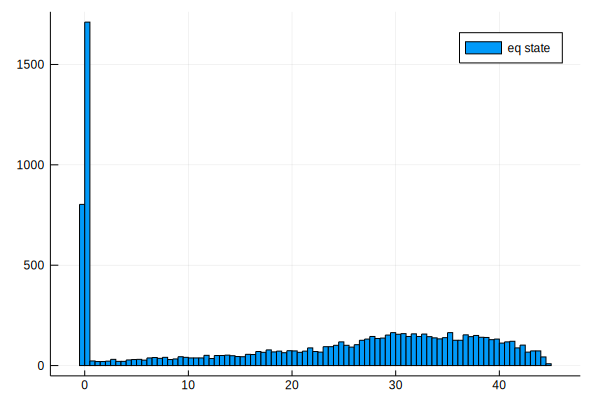

In [78]:
histogram(eq_ary, label="eq state", bins=100)

## Problem 2

From the previous problem, you constructed an output sample for $S$.  Is the average of this sample output equal to the output of the model sampled at the **mean** of the inputs?  Explain why or why not.

They are not equal as shown in the graph above beause the system is not linear. 

## Problem 3

From class, we saw that a regression model, even a non-linear one, can be interpreted as linear *in the parameters*.  Write the following regression model in matrix form such that this linear relationship is made explicit. 

$$ y = f(\vec{x},\vec{q}) = \begin{bmatrix} q_1 + q_2 \sin(x_1) + q_3 x_1^2 \\ q_1 + q_2 \cos(x_2) + q_3 x_2^2 \end{bmatrix} $$

In [79]:
function solve_SB(x, q) 
    if length(x) != 2 || length(q) != 3
        error("Vector x must have two elements, and vector q must have three elements.")
    else
        y = zeros(2,1)
        y[1,1] = q[1] + q[2]*sin(x[1])+q[3]*x[1]^2
        y[2,1] = q[1] + q[2]*cos(x[2])+q[3]*x[2]^2
    end
    return y
end;
solve_SB([1,2],[1,2,3])

2×1 Array{Float64,2}:
  5.6829419696157935
 12.167706326905716 

$$ y = f(\vec{x},\vec{q}) = \begin{bmatrix} q_1 + q_2 \sin(x_1) + q_3 x_1^2 \\ q_1 + q_2 \cos(x_2) + q_3 x_2^2 \end{bmatrix} = \begin{bmatrix} 1 + \sin(x_1) + x_1^2 \\ 1 + \cos(x_2) + x_2^2 \end{bmatrix}\begin{bmatrix}q_1\\q_2\\q_3 \end{bmatrix}$$

## Problem 4

Using the function from Problem 3, determine the analytic equations for the mean and variance of $y$ given the following information about $\vec{q}$:

- mean of $\vec{q}$ is $$\bar{q}\ =\ [\bar{q_1},\ \bar{q_2},\ \bar{q_3}]$$
- covaiance matrix for $\vec{q}$ is
$$ V = \begin{bmatrix}  
        \alpha & 0 & \beta \\
        0 & \alpha & 0 \\
        \beta & 0 & \alpha 
       \end{bmatrix}.$$

$E[f_1(Q)] = \bar q_1 + \sum_{j=1}^{3}x_{1j}\bar q_j = \bar q_1 + \sin(x_1) \bar q_2 + x_1^2 \bar q_3$

$E[f_2(Q)] = \bar q_1 + \sum_{j=1}^{3}x_{2j}\bar q_j= \bar q_1 + \cos(x_1) \bar q_2 + x_2^2 \bar q_3$

$Var[f_1(Q)]$ $=Var[q_1]+\sum_{j=2}^{3}(x_{1j})^2 Var[q_j] + 2\sum_{j=2}^{3}x_{1j}Cov[q_1,q_j] + 2\sum_{j>k}^{3}
t_{1j}x_{1k} Cov[q_k,q_j]\\
= Var[q_1]+\sin^2(x_1) Var[q_2] + x_1^4 Var[q_3] + 2(\sin(x_{1})Cov[q_1,q_2]+x_1^2Cov[q_1,q_2]+2(\sin(x_1)x_1^2Cov[q_2,q_3])\\
=\alpha+\sin^2(x_1) \alpha + x_1^4 \alpha + 2(\sin(x_1)*0 + x_1^2\beta) + 2(\sin(x_1)x_1^2*0)\;(\because Var[q_1]=Var[q_2] = Var[q_3]=\alpha. Cov[q_1,q_2]=Cov[q_2,q_3]=0, Cov[q_1,q_3]=\beta)\\
=\alpha+\sin^2(x_1) \alpha + x_1^4 \alpha + 2x_1^2\beta$

$Var[f_2(Q)]$ $=Var[q_1]+\sum_{j=2}^{3}(x_{2j})^2 Var[q_j] + 2\sum_{j=2}^{3}x_{2j}Cov[q_1,q_j] + 2\sum_{j>k}^{3}
x_{2j}x_{2k} Cov[q_k,q_j] \\= Var[q_1]+\cos^2(x_2) Var[q_2] + x_2^4 Var[q_3] + 2(\cos(x_2)*Cov[q_1,q_2] + x_2^2Cov[q_1,q_3]) + 2(\cos(x_2)x_2^2*Cov[q_2,q_3])
\\=\alpha+\cos^2(x_2) \alpha + x_2^4 \alpha + 2(\cos(x_2)*0 + x_2^2\beta) + 2(\cos(x_2)x_2^2*0)\;(\because Var[q_1]=Var[q_2] = Var[q_3]=\alpha. Cov[q_1,q_2]=Cov[q_2,q_3]=0, Cov[q_1,q_3]=\beta)\\
=\alpha+\cos^2(x_2)\alpha+x_2^4\alpha + 2x_2^2\beta$